In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
from math import exp

#### Question

Consider the following X-ray whole-body image, in which the narrow dynamic range of the Gray levels and the high noise content make this image difficult to analyse without enhancement. The objective is to enhance the image by sharpening it and by bringing out more of the skeleton details. Write your algorithm to implement the task

Text(0.5, 1.0, 'Original Image')

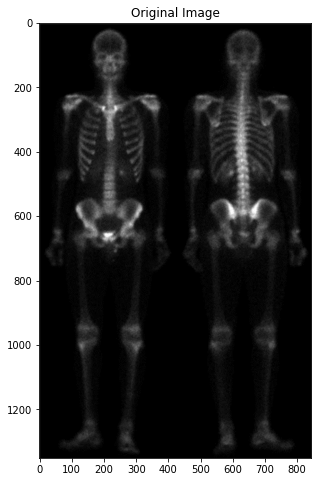

In [2]:
image = cv2.imread("images/skeleton.jpg")
plt.figure(figsize=(10, 8))
plt.imshow(image, "gray")
plt.title("Original Image")

#### Answer

In [3]:
denoisy_img = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)

In [4]:
gray_img = cv2.cvtColor(denoisy_img, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'De-Noised Image')

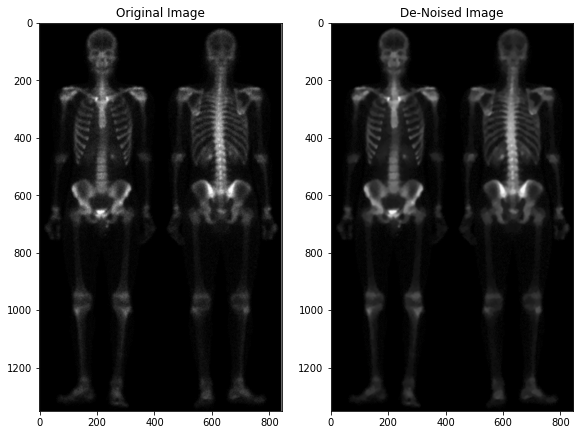

In [5]:
plt.figure(figsize=(20, 16))

plt.subplot(141)
plt.imshow(image, "gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(denoisy_img, "gray")
plt.title("De-Noised Image")

In [8]:
eq_img = cv2.equalizeHist(gray_img)

In [9]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

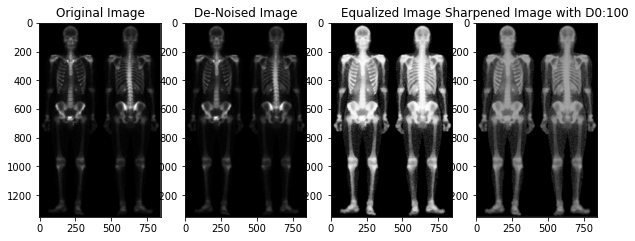

In [10]:
d0 = 100

# perform FFT
original = np.fft.fft2(eq_img)
# get spectrum
center = np.fft.fftshift(original)
# center spectrum for high pass
HighPassCenter = center * gaussianHP(d0,eq_img.shape)
# perform high pass
HighPass = np.fft.ifftshift(HighPassCenter)
# reverse FFT -> IFFT
inverse_HighPass = np.fft.ifft2(HighPass)
# add filter to original image
sharpened = eq_img+np.abs(inverse_HighPass)


plt.figure(figsize=(10, 8))


plt.subplot(141)
plt.imshow(image, "gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(gray_img, "gray")
plt.title("De-Noised Image")

plt.subplot(143)
plt.imshow(eq_img, "gray")
plt.title("Equalized Image")

plt.subplot(144)
plt.imshow(sharpened,cmap="gray")
plt.title("Sharpened Image with D0:"+str(d0))
plt.show()

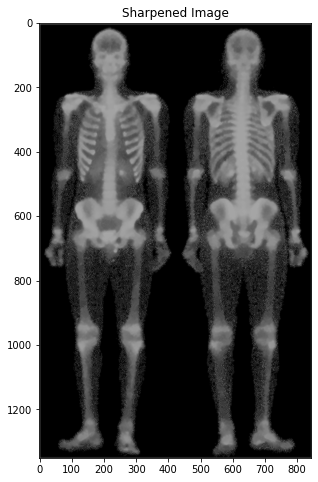

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(sharpened,cmap="gray")
plt.title("Sharpened Image")
plt.show()

#### Some useful functions that were not used

#### Function for converting to grayscale

This function converts the colored image of MN pixel to Grayscale

Converts (M x N x 3) matrix to (M x N) matrix by the dot product with a (3 x 1) matrix such as [0.2989, 0.5870, 0.1140]

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#### Function for applying median filter

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [ ]:
gray_img = rgb2gray(image)

In [ ]:
denoisy_img = median_filter(gray_img,3)